In [111]:
%matplotlib inline

import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
BOTS = ['NNBot', 'NNBotWithObservePropose', 'ObserveBot', 'RandomBot', 'RandomBotUV', 'SimpleBot', 'SimpleStatsBot']
DATA_BY_BOT = {}
for bot in BOTS:
    print "Loading", bot
    with gzip.open('human/{}.msg.gz'.format(bot), 'r') as f:
        DATA_BY_BOT[bot] = pd.read_msgpack(f)
    
with gzip.open('human/actions.msg.gz', 'r') as f:
    HUMAN_ACTIONS = pd.read_msgpack(f)

Loading NNBot
Loading NNBotWithObservePropose
Loading ObserveBot
Loading RandomBot
Loading RandomBotUV
Loading SimpleBot
Loading SimpleStatsBot


In [50]:
def grouped_barplot(plot_title, series_titles, group_titles, basis, *serieses):
    plt.figure(figsize=(16,8))
    # set width of bar
    COLORS = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3']
    barWidth = 1.0/(1 + len(serieses))

    # set height of bar
    bars1 = serieses[0]

    # Set position of bar on X axis
    positions = [ np.arange(len(bars1)) ]
    for _ in range(len(serieses) - 1):
        positions.append([x + barWidth for x in positions[-1] ])

    for i, (title, pos, series) in enumerate(zip(series_titles, positions, serieses)):
        plt.bar(pos, series, color=COLORS[i], width=barWidth, edgecolor='white', label=title)

    if basis is not None:
        plt.axhline(basis, color="gray")
        
    # Add xticks on the middle of the group bars
    plt.xlabel('group', fontweight='bold')
    plt.xticks([r + barWidth*(len(serieses) / 2.0 - 0.5) for r in range(len(bars1))], group_titles)

    # Create legend & Show graphic
    plt.title(plot_title)
    plt.legend()
    plt.show()

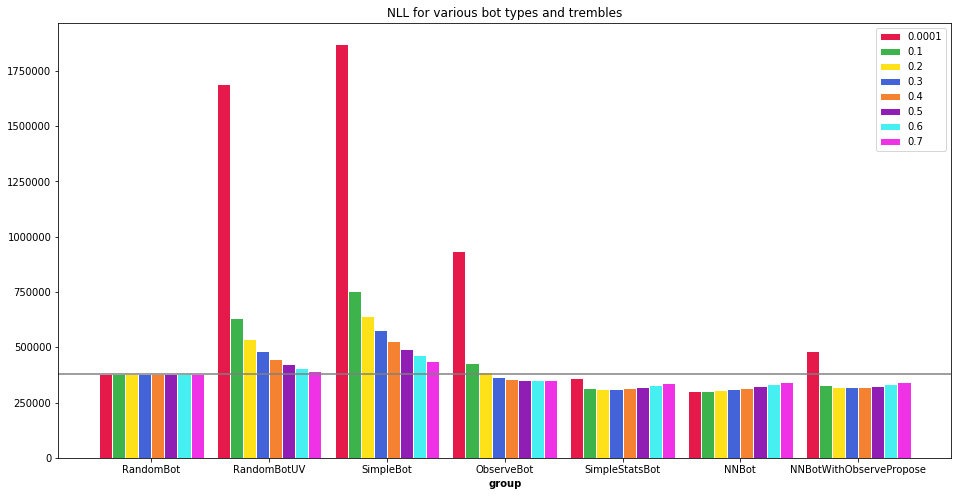

In [59]:
plot_title = "NLL for various bot types and trembles"
trembles = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
bots = ["RandomBot", "RandomBotUV", "SimpleBot", "ObserveBot", "SimpleStatsBot", "NNBot", "NNBotWithObservePropose"]
BOT_DATA = [ DATA_BY_BOT[bot] for bot in bots ]
serieses = [ [ data[data.trembling_hand_prob == p].nll.sum() for data in BOT_DATA] for p in trembles ]
grouped_barplot(plot_title, trembles, bots, serieses[0][0], *serieses)

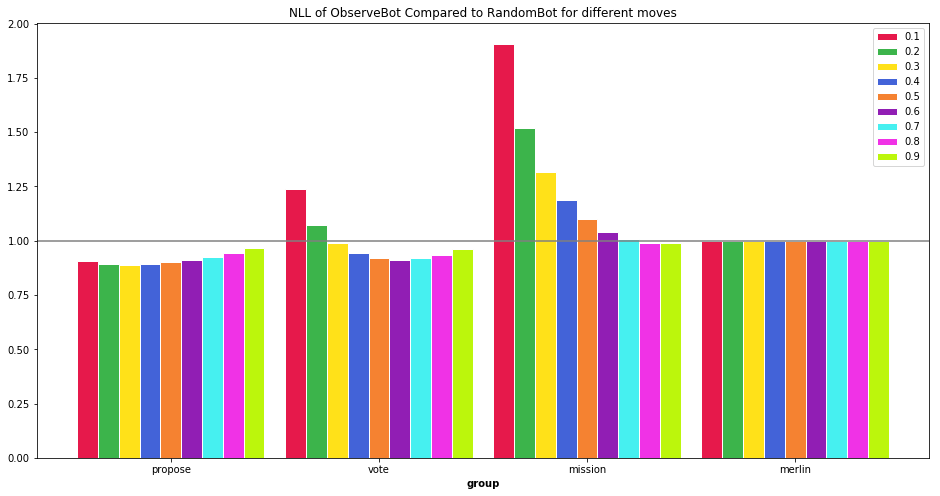

In [79]:
OB_DATA = DATA_BY_BOT['ObserveBot']
RAND_DATA = DATA_BY_BOT['RandomBot']
plot_title = "NLL of ObserveBot Compared to RandomBot for different moves"
trembles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
move_types = ["propose", "vote", "mission", "merlin"]
rand_perf = {
    typ: RAND_DATA[(RAND_DATA.type == typ) & (RAND_DATA.trembling_hand_prob == 0.1)].nll.sum()
    for typ in move_types
}
serieses = [
    [
        OB_DATA[(OB_DATA.type == typ) & (OB_DATA.trembling_hand_prob == p)].nll.sum()/rand_perf[typ]
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

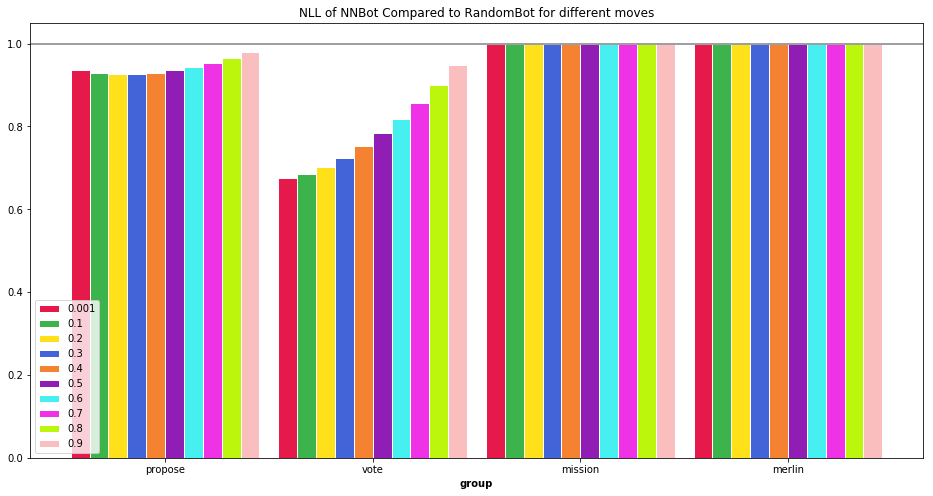

In [54]:
NN_DATA = DATA_BY_BOT['NNBot']
RAND_DATA = DATA_BY_BOT['RandomBot']
plot_title = "NLL of NNBot Compared to RandomBot for different moves"
trembles = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
move_types = ["propose", "vote", "mission", "merlin"]
rand_perf = {
    typ: RAND_DATA[(RAND_DATA.type == typ) & (RAND_DATA.trembling_hand_prob == 0.1)].nll.sum()
    for typ in move_types
}
serieses = [
    [
        NN_DATA[(NN_DATA.type == typ) & (NN_DATA.trembling_hand_prob == p)].nll.sum()/rand_perf[typ]
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

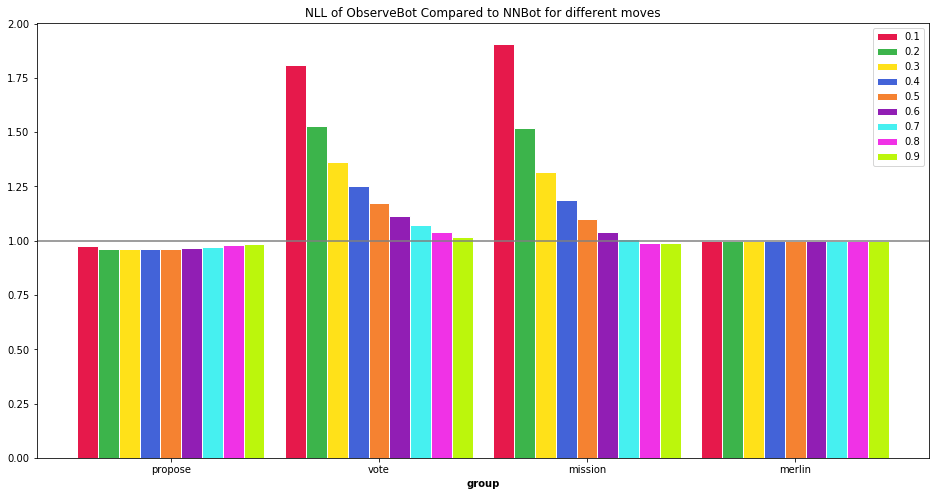

In [55]:
plot_title = "NLL of ObserveBot Compared to NNBot for different moves"
trembles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
move_types = ["propose", "vote", "mission", "merlin"]

serieses = [
    [
        (
            OB_DATA[(OB_DATA.type == typ) & (OB_DATA.trembling_hand_prob == p)].nll.sum() /
            NN_DATA[(NN_DATA.type == typ) & (NN_DATA.trembling_hand_prob == p)].nll.sum()
        )
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

/Users/jserrino/.virtualenvs/battlefield/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


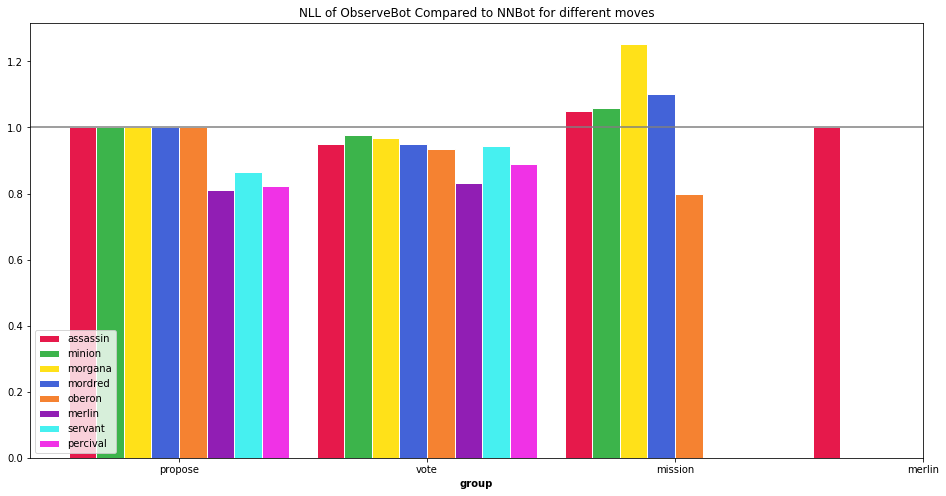

In [56]:
plot_title = "NLL of ObserveBot Compared to NNBot for different moves"
roles = ['assassin', 'minion', 'morgana', 'mordred', 'oberon', 'merlin', 'servant', 'percival']
move_types = ["propose", "vote", "mission", "merlin"]

serieses = [
    [
        (
            OB_DATA[(OB_DATA.role == role) & (OB_DATA.type == typ) & (OB_DATA.trembling_hand_prob == 0.5)].nll.sum() /
            RAND_DATA[(RAND_DATA.role == role) & (RAND_DATA.type == typ) & (RAND_DATA.trembling_hand_prob == 0.5)].nll.sum()
        )
        for typ in move_types
    ]
    for role in roles
]
grouped_barplot(plot_title, roles, move_types, 1.0, *serieses)

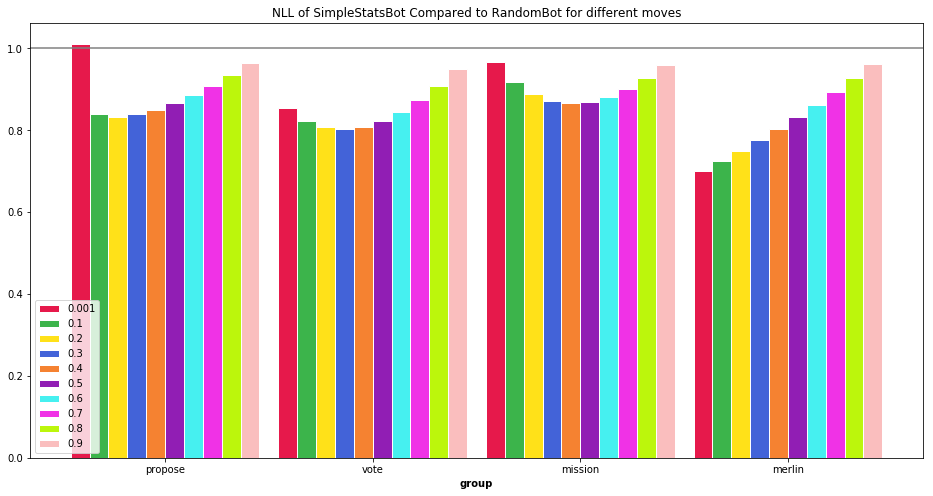

In [57]:
SSB_DATA = DATA_BY_BOT['SimpleStatsBot']
RAND_DATA = DATA_BY_BOT['RandomBot']
plot_title = "NLL of SimpleStatsBot Compared to RandomBot for different moves"
trembles = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
move_types = ["propose", "vote", "mission", "merlin"]
rand_perf = {
    typ: RAND_DATA[(RAND_DATA.type == typ) & (RAND_DATA.trembling_hand_prob == 0.1)].nll.sum()
    for typ in move_types
}
serieses = [
    [
        SSB_DATA[(SSB_DATA.type == typ) & (SSB_DATA.trembling_hand_prob == p)].nll.sum()/rand_perf[typ]
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

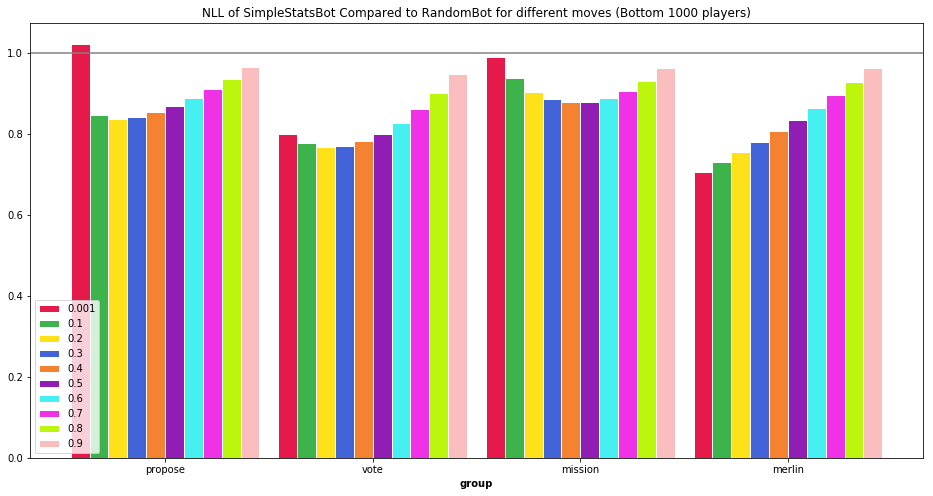

In [99]:
TOP100_PLAYERS = RAND_DATA.player.value_counts()[:100].reset_index()['index']
SSB_TOP100_DATA = SSB_DATA[SSB_DATA.player.isin(TOP100_PLAYERS)]
RAND_TOP100_DATA = RAND_DATA[RAND_DATA.player.isin(TOP100_PLAYERS)]
plot_title = "NLL of SimpleStatsBot Compared to RandomBot for different moves (Bottom 1000 players)"
trembles = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
move_types = ["propose", "vote", "mission", "merlin"]
rand_perf = {
    typ: RAND_TOP100_DATA[(RAND_TOP100_DATA.type == typ) & (RAND_TOP100_DATA.trembling_hand_prob == 0.1)].nll.sum()
    for typ in move_types
}
serieses = [
    [
        SSB_TOP100_DATA[(SSB_TOP100_DATA.type == typ) & (SSB_TOP100_DATA.trembling_hand_prob == p)].nll.sum()/rand_perf[typ]
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

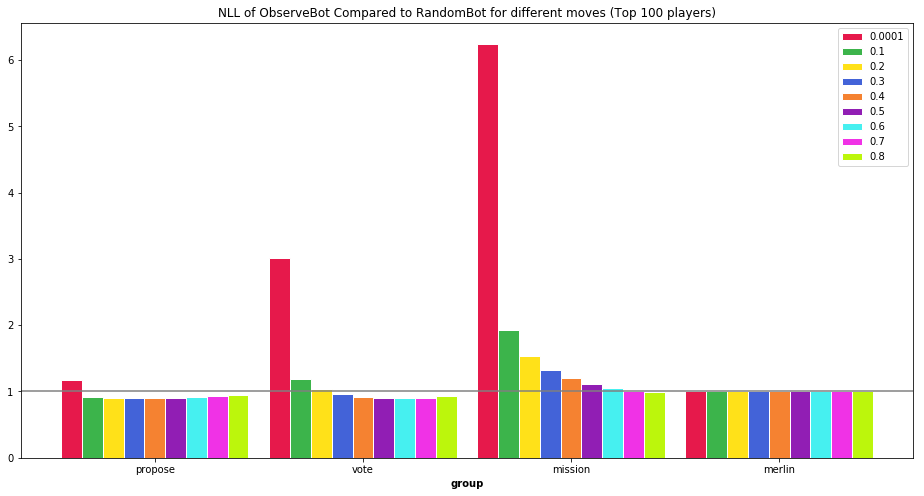

In [100]:
OB_TOP100_DATA = OB_DATA[OB_DATA.player.isin(TOP100_PLAYERS)]
plot_title = "NLL of ObserveBot Compared to RandomBot for different moves (Top 100 players)"
trembles = [0.0001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
move_types = ["propose", "vote", "mission", "merlin"]
rand_perf = {
    typ: RAND_TOP100_DATA[(RAND_TOP100_DATA.type == typ) & (RAND_TOP100_DATA.trembling_hand_prob == 0.1)].nll.sum()
    for typ in move_types
}
serieses = [
    [
        OB_TOP100_DATA[(OB_TOP100_DATA.type == typ) & (OB_TOP100_DATA.trembling_hand_prob == p)].nll.sum()/rand_perf[typ]
        for typ in move_types
    ]
    for p in trembles
]
grouped_barplot(plot_title, trembles, move_types, 1.0, *serieses)

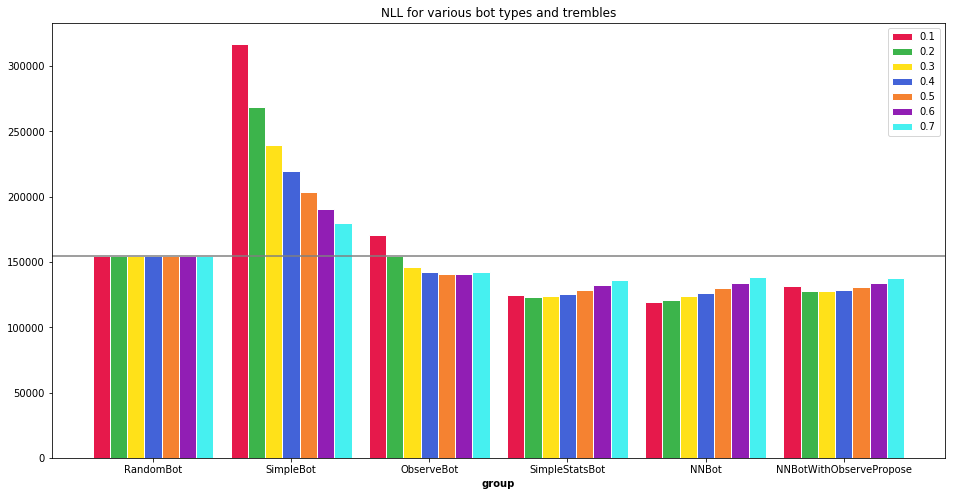

In [101]:
TOP100_PLAYERS = RAND_DATA.player.value_counts()[:100].reset_index()['index']
plot_title = "NLL for various bot types and trembles (Top 100 players)"
trembles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
bots = ["RandomBot", "SimpleBot", "ObserveBot", "SimpleStatsBot", "NNBot", "NNBotWithObservePropose"]
BOT_DATA = [ DATA_BY_BOT[bot] for bot in bots ]
BOT_DATA = [ bot[bot.player.isin(TOP100_PLAYERS)] for bot in BOT_DATA ]
serieses = [ [ data[data.trembling_hand_prob == p].nll.sum() for data in BOT_DATA] for p in trembles ]
grouped_barplot(plot_title, trembles, bots, serieses[0][0], *serieses)

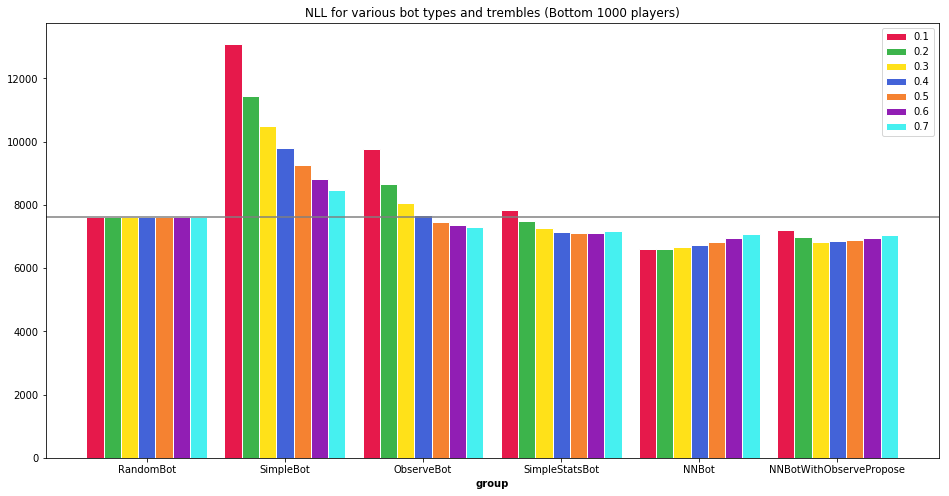

In [102]:
BOTTOM1000_PLAYERS = RAND_DATA.player.value_counts()[-1000:].reset_index()['index']
plot_title = "NLL for various bot types and trembles (Bottom 1000 players)"
trembles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
bots = ["RandomBot", "SimpleBot", "ObserveBot", "SimpleStatsBot", "NNBot", "NNBotWithObservePropose"]
BOT_DATA = [ DATA_BY_BOT[bot] for bot in bots ]
BOT_DATA = [ bot[bot.player.isin(BOTTOM1000_PLAYERS)] for bot in BOT_DATA ]
serieses = [ [ data[data.trembling_hand_prob == p].nll.sum() for data in BOT_DATA] for p in trembles ]
grouped_barplot(plot_title, trembles, bots, serieses[0][0], *serieses)

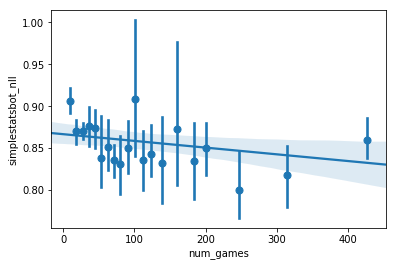

In [138]:
SSB_DATA = DATA_BY_BOT['SimpleStatsBot']
RAND_DATA = DATA_BY_BOT['RandomBot']
GAMES_PLAYED_BY_PLAYER = HUMAN_ACTIONS.groupby(['game', 'player']).size().reset_index()[['game', 'player']]
GAMES_PLAYED_BY_PLAYER = GAMES_PLAYED_BY_PLAYER.player.value_counts().reset_index()
PLAY_COUNTS = GAMES_PLAYED_BY_PLAYER.player.unique()

if data is None:
    data = []
    for play_count in PLAY_COUNTS:
        player_with_play_count = GAMES_PLAYED_BY_PLAYER[GAMES_PLAYED_BY_PLAYER.player == play_count]['index']
        print play_count
        data.append({
            'num_games': play_count,
            'simplestatsbot_nll': (
                SSB_DATA[SSB_DATA.player.isin(player_with_play_count)].nll.sum() /
                RAND_DATA[RAND_DATA.player.isin(player_with_play_count)].nll.sum()
            )
        })

df = pd.DataFrame(data[10:])
sns.regplot(x='num_games', y='simplestatsbot_nll', data=df, x_bins=20)